In [1]:
#!pip install -q git+https://github.com/huggingface/transformers.git

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.12/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation 

In [1]:
import torch
import requests
from PIL import Image
from transformers import RTDetrForObjectDetection, RTDetrImageProcessor

model_name = "PekingU/rtdetr_r50vd_coco_o365"
image_processor = RTDetrImageProcessor.from_pretrained(model_name)
model = RTDetrForObjectDetection.from_pretrained(model_name)

In [2]:
image = Image.open('/home/juan-carlos/Dropbox/Object_detection/Example/frame_30.png')
inputs = image_processor(images=image, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)
results = image_processor.post_process_object_detection(outputs, target_sizes=torch.tensor([image.size[::-1]]), threshold=0.6)
     

In [3]:
for result in results:
    for score, label_id, box in zip(result["scores"], result["labels"], result["boxes"]):
        score, label = score.item(), label_id.item()
        box = [round(i, 2) for i in box.tolist()]
        print(f"{model.config.id2label[label]}: {score:.2f} {box}")

person: 0.95 [24.35, 71.77, 131.39, 337.21]
person: 0.94 [159.35, 135.42, 279.03, 358.88]
person: 0.94 [113.26, 59.67, 179.67, 328.46]
person: 0.93 [225.0, 100.61, 276.66, 254.57]
person: 0.85 [277.28, 0.69, 318.93, 149.51]
person: 0.84 [164.96, 40.62, 220.82, 160.85]
person: 0.79 [214.55, 29.56, 253.41, 146.32]
person: 0.72 [348.14, 8.57, 414.72, 208.53]


In [4]:
from transformers import pipeline

pipe = pipeline(model=model_name)
pipe(image)

[{'score': 0.9491063356399536,
  'label': 'person',
  'box': {'xmin': 24, 'ymin': 71, 'xmax': 131, 'ymax': 337}},
 {'score': 0.9392462372779846,
  'label': 'person',
  'box': {'xmin': 159, 'ymin': 135, 'xmax': 279, 'ymax': 358}},
 {'score': 0.9388538002967834,
  'label': 'person',
  'box': {'xmin': 113, 'ymin': 59, 'xmax': 179, 'ymax': 328}},
 {'score': 0.9325138330459595,
  'label': 'person',
  'box': {'xmin': 224, 'ymin': 100, 'xmax': 276, 'ymax': 254}},
 {'score': 0.8502450585365295,
  'label': 'person',
  'box': {'xmin': 277, 'ymin': 0, 'xmax': 318, 'ymax': 149}},
 {'score': 0.8366739749908447,
  'label': 'person',
  'box': {'xmin': 164, 'ymin': 40, 'xmax': 220, 'ymax': 160}},
 {'score': 0.794569730758667,
  'label': 'person',
  'box': {'xmin': 214, 'ymin': 29, 'xmax': 253, 'ymax': 146}},
 {'score': 0.71599942445755,
  'label': 'person',
  'box': {'xmin': 348, 'ymin': 8, 'xmax': 414, 'ymax': 208}}]

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_bbox(image, data):
   # Create a figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image)

    for result in results:
        for score, label_id, box in zip(result["scores"], result["labels"], result["boxes"]):
            # Unpack the bounding box coordinates
            x1, y1, x2, y2 = box
            # Create a Rectangle patch
            rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
            # Add the rectangle to the Axes
            ax.add_patch(rect)
            # Annotate the label
            label = model.config.id2label[label_id.item()]
            plt.text(x1, y1, label, color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

        # Remove the axis ticks and labels
        ax.axis('off')

    # Show the plot
    plt.show()

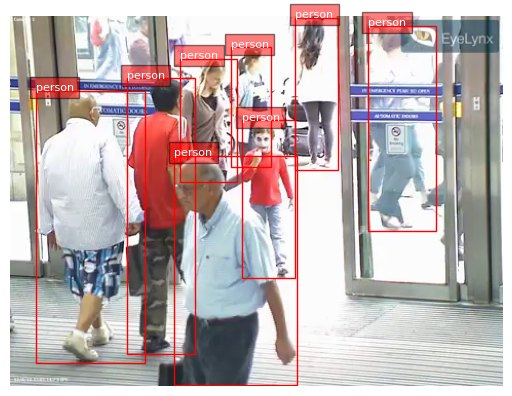

In [6]:
plot_bbox(image,results)

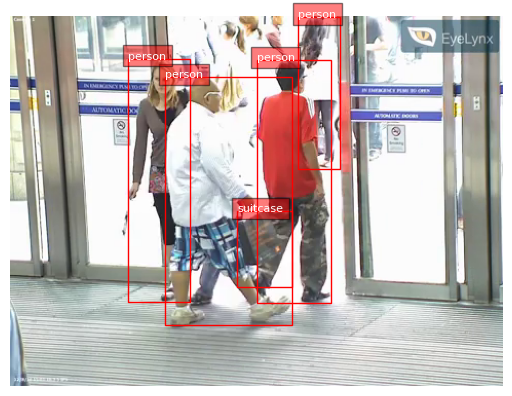

In [7]:
image = Image.open('/home/juan-carlos/Dropbox/Object_detection/Example/frame_40.png')
inputs = image_processor(images=image, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)
results = image_processor.post_process_object_detection(outputs, target_sizes=torch.tensor([image.size[::-1]]), threshold=0.6)
plot_bbox(image,results)

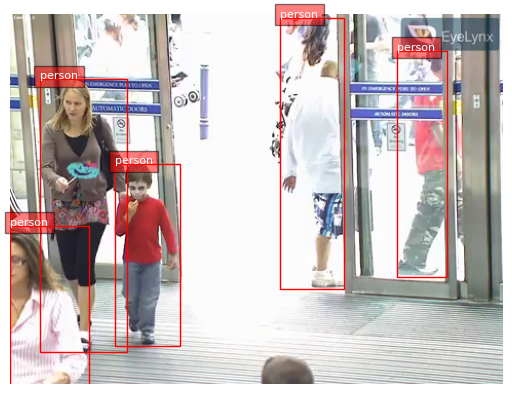

In [8]:
image = Image.open('/home/juan-carlos/Dropbox/Object_detection/Example/frame_50.png')
inputs = image_processor(images=image, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)
results = image_processor.post_process_object_detection(outputs, target_sizes=torch.tensor([image.size[::-1]]), threshold=0.6)
plot_bbox(image,results)